# Проект

**Аннотация к проекту:** мы нашли датасет с данными о бронированиях в отеле. Данные, представленные в нём, оказались удачными для того, чтобы попробовать научить модель предсказывать, отменит гость бронирование номера в отеле или нет. Попробуем сделать это с помощью KNN, а также с помощью логистической регрессии.
Помимо этого попытаемся обучить модель линейной регрессии для предсказания стоимости номера в отеле.

**План проекта**:


1.   Импорт необходимых библиотек для проведения исследования.
2.   Чтение данных и объяснений сути каждой переменной, представленной в датасете.
3.   Визуализация признаков и выдвижение гипотез для модели классификации:
    * гипотеза о влиянии количества гостей на отмену бронирования: можно предположить, что бронирования с большим количеством гостей менее склонны к большей вероятности отмены;
    * гипотеза о влиянии времени ожидания (lead_time) на отмену бронирования: можно предположить, что бронирования с более длительным временем ожидания имеют более высокую вероятность отмены;
    * гипотеза о влиянии наличия парковочного места (required_car_parking_space) на отмену бронирования: можно предположить, что клиенты, которым требуется парковочное место (соответственно, у них есть машина), имеют более низкую вероятность отмены;
    * гипотеза о влиянии времени года на отмену бронирования: в тёплое время года вероятность отмены бронирования снижается, так как люди едут в отпуска, которые планируют заблаговременно.
4.   Проверка гипотез.
5.   Обучение модели классификации со всеми сопутствующими этапами.
6.   Оценка качества модели и подбор оптимального значения параметра k.
7.   Обучение модели логистической регрессии.
8.   Оценка качества обученной модели логистической регрессии.
9.   Обучение модели линейной регрессии для предсказания стоимости номера в отеле.
10.   Визуализация признаков и выдвижение гипотезы для линейной регрессии (приведённые в датасете признаки не особо влияют на стоимость номера):
11.   Проверка гипотез.
12.   Обучение модели регрессии со всеми сопутствующими этапами.
13.   Оценка качества модели. Выводы.

1. Импорт необходимых библиотек:

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from pandas.core.reshape.encoding import get_dummies

2. Чтение данных:

In [ ]:
data = pd.read_csv('Hotel Reservations.csv')
data

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [ ]:
data.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


Рассмотрим и поясним, какие именно признаки представлены в датасете:

*   **Booking_ID**: уникальный идентификатор каждого бронирования
*   **no_of_adults**: количество взрослых в бронировании
*   **no_of_children**: количество детей в бронировании
*   **no_of_weekend_nights**: количество выходных ночей в бронировании
*   **no_of_week_nights**: количество будних ночей в бронировании
*   **type_of_meal_plan**: Tтип питания в бронировании
*   **required_car_parking_space**: требуется ли парковочное место (1 - да, 0 - нет)
*   **room_type_reserved**: тип номера в бронировании
*   **lead_time**: количество дней между датой бронирования и датой прибытия
*   **arrival_year**: год прибытия
*   **arrival_month**: месяц прибытия
*   **arrival_date**: число прибытия
*   **market_segment_type**: рыночный сегмент гостя (бронь сделана онлайн или оффлайн)
*   **repeated_guest**: был ли гость в отеле ранее (0 - нет, 1- да)
*   **no_of_previous_cancellations**: количество предыдущих бронирований, которые были отменены клиентом до текущей брони
*   **no_of_previous_bookings_not_canceled**: количество предыдущих бронирований, которые не были отменены клиентом до текущей брони
*   **avg_price_per_room**: средняя стоимость ежедневного пребывания в отеле (в евро)
*   **no_of_special_requests**: общее число особых запросов при бронировании (например, высокий этаж, вид из номера и т.д.)
*   **booking_status**: статус брони в текущий момент (отменена или нет)

3. Размерность таблицы:

In [ ]:
data.shape

(36275, 19)

4. С помощью .info() проверим столбцы на пропуски и обратим внимание на то, какие типы данных и в каких столбцах находятся:

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

Пропусков в столбцах нет, в колонках с числовыми признаками тип данных int - целые числа, в колонках с категориальными признаками - тип данных object. Никакие преобразования не требуются.

5. Теперь поработаем с признаками: преобразуем их, создадим новые, удалим ненужные для дальнейшего анализа столбцы и так далее.

Например, мы можем создать новый столбец 'amount_of_guests', в котором будет сумма детей и взрослых для каждой брони; столбец no_of_adults после этого нам больше не будет нужен, удалим его:

In [ ]:
data['amount_of_guests'] = data[['no_of_adults','no_of_children']].sum(axis=1)
data_without_guests = data.pop('amount_of_guests')
data.insert(1, 'amount_of_guests', data_without_guests)
data.drop(columns=data.columns[2], axis=1 , inplace=True )
data

,Booking_ID,amount_of_guests,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


Переименуем столбец no_of_children в children, он содержит только 0 и 1, переименовав, будем воспринимать его как бинарный: есть дети в целом или нет, количество не имеет значения

In [ ]:
data = data.rename(columns={'no_of_children':'children'})
data

,Booking_ID,amount_of_guests,children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


Кроме того, нам не нужны конкретные даты заезда гостей, однако может быть важен сезон. Создаём столбец season в который мы впишем значения Зима, Весна, Лето или Осень на основании номера месяца. Затем удалим колонки с днём, месяцем и годом заезда.

In [ ]:
data['seasons']= ''
s_s = data.pop('seasons')
data.insert(12, 'seasons', s_s)
seasons = {1: 'Зима', 2: 'Зима', 3: 'Весна', 4: 'Весна', 5: 'Весна', 6: 'Лето', 7: 'Лето', 8: 'Лето', 9: 'Осень', 10: 'Осень', 11: 'Осень', 12: 'Зима'}
pri = data['arrival_month'].map(seasons)
data['seasons'] = pri
data = data.drop(columns = ['arrival_year'],axis = 1)
data = data.drop(columns = ['arrival_month'],axis = 1)
data = data.drop(columns = ['arrival_date'],axis = 1)
data

,Booking_ID,amount_of_guests,children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,seasons,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,Осень,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,Осень,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,Зима,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,Весна,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,Весна,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,Лето,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,Осень,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,Лето,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,Весна,Online,0,0,0,94.50,0,Canceled


Теперь можно создать признак booking на основе no_of_previous_cancellations. Точное количество отмен не особо имеет значение, а вот их наличие в целом - да Если гость ранее уже отменял бронирование, то в booking будет стоять 1 и, соответственно, 0, если такого не было.

In [ ]:
booking = []
for value in data['no_of_previous_cancellations']:
    if value == 0:
        booking.append(0)
    else:
        booking.append(1)

data['booking'] = booking
data

,Booking_ID,amount_of_guests,children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,seasons,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,booking
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,Осень,Offline,0,0,0,65.00,0,Not_Canceled,0
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,Осень,Online,0,0,0,106.68,1,Not_Canceled,0
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,Зима,Online,0,0,0,60.00,0,Canceled,0
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,Весна,Online,0,0,0,100.00,0,Canceled,0
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,Весна,Online,0,0,0,94.50,0,Canceled,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,Лето,Online,0,0,0,167.80,1,Not_Canceled,0
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,Осень,Online,0,0,0,90.95,2,Canceled,0
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,Лето,Online,0,0,0,98.39,2,Not_Canceled,0
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,Весна,Online,0,0,0,94.50,0,Canceled,0


Для того, чтобы не путаться между колонками booking_status и booking, переименуем первый столбец в status:

In [ ]:
data = data.rename(columns = {'booking_status':'status'})
data

,Booking_ID,amount_of_guests,children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,seasons,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,status,booking
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,Осень,Offline,0,0,0,65.00,0,Not_Canceled,0
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,Осень,Online,0,0,0,106.68,1,Not_Canceled,0
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,Зима,Online,0,0,0,60.00,0,Canceled,0
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,Весна,Online,0,0,0,100.00,0,Canceled,0
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,Весна,Online,0,0,0,94.50,0,Canceled,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,Лето,Online,0,0,0,167.80,1,Not_Canceled,0
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,Осень,Online,0,0,0,90.95,2,Canceled,0
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,Лето,Online,0,0,0,98.39,2,Not_Canceled,0
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,Весна,Online,0,0,0,94.50,0,Canceled,0


In [ ]:
data.describe()

,amount_of_guests,children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.950241,0.105279,0.810724,2.204300,0.030986,85.232557,0.025637,0.023349,0.153411,103.423539,0.619655,0.009318
std,0.650327,0.402648,0.870644,1.410905,0.173281,85.930817,0.158053,0.368331,1.754171,35.089424,0.786236,0.096079
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.300000,0.000000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.450000,0.000000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,1.000000,0.000000
max,12.000000,10.000000,7.000000,17.000000,1.000000,443.000000,1.000000,13.000000,58.000000,540.000000,5.000000,1.000000


Теперь попробуем понять, как некоторые из признаков влияют на статус бронирования. Проверим, влияют ли на отмену следующие признаки: количество дней до заезда

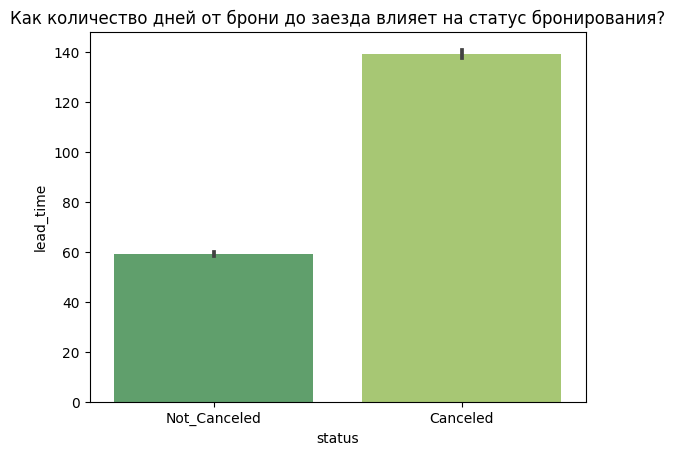

In [ ]:
sns.barplot(x='status', y='lead_time', data=data, palette='summer')
plt.title('Как количество дней от брони до заезда влияет на статус бронирования?')
plt.show()

Видим, что те клиенты, которые бронировали отель сильно заранее, чаще всего отменяют бронирование. Таким образом, можно предположить, что чем раньше человек бронирует, тем выше вероятность отмены.

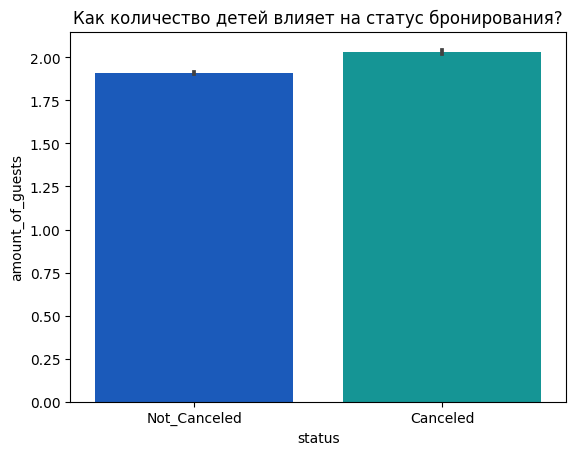

In [ ]:
sns.barplot(x='status', y='amount_of_guests', data=data, palette='winter')
plt.title('Как количество детей влияет на статус бронирования?')
plt.show()

Очевидно, что количество гостей не влияет на вероятность отмены бронирования.

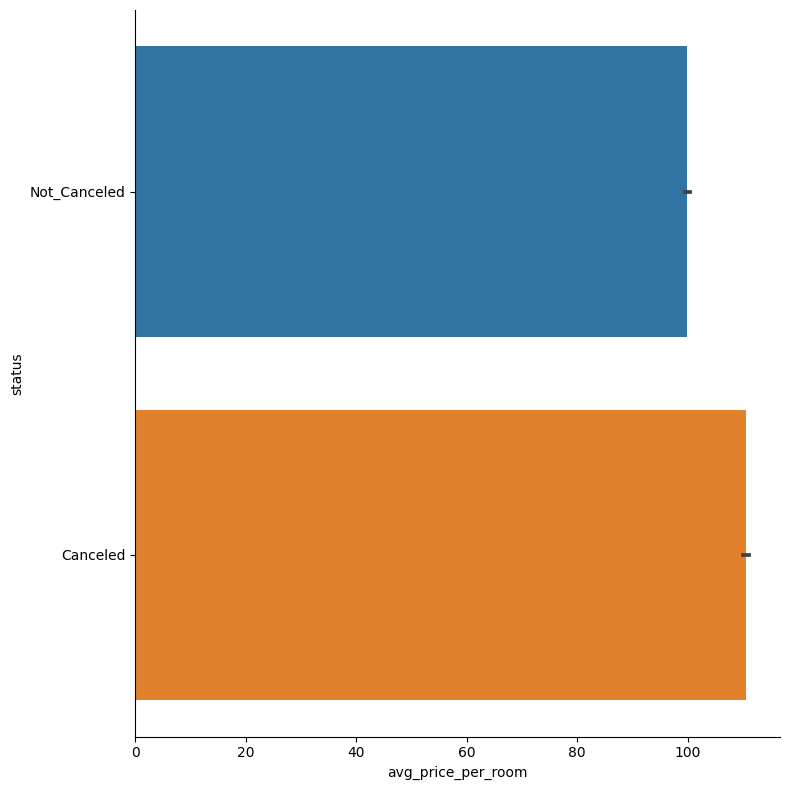

In [ ]:
sns.catplot(data=data, x = 'avg_price_per_room', y = 'status', kind='bar', height = 8)

В соответствии с графиком можно сказать, что стоимость номера совсем незначительно влияет на перспективу отмены бронирования.

In [ ]:
data.groupby('seasons')['status'].value_counts().to_frame()

status
seasons status              
Весна   Not_Canceled    5049
        Canceled        2643
Зима    Not_Canceled    4883
        Canceled         856
Лето    Not_Canceled    5843
        Canceled        4093
Осень   Not_Canceled    8615
        Canceled        4293

In [ ]:
seasons = ['Весна', 'Зима', 'Лето', 'Осень']
canceled = [2643, 856, 4093, 4293]
non_canceled = [5049, 4883, 5843, 8615]

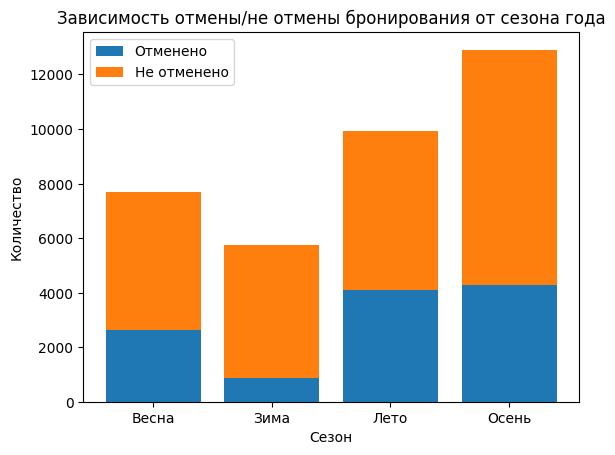

In [ ]:
plt.bar(seasons, canceled, label='Отменено')
plt.bar(seasons, non_canceled, bottom=canceled, label='Не отменено')
plt.legend()
plt.xlabel('Сезон')
plt.ylabel('Количество')
plt.title('Зависимость отмены/не отмены бронирования от сезона года')
plt.show()

Можно заметить, что больше всего гостей было осенью и летом. При этом можно также сказать, что осенью было больше отмен в абсолютном значении, чем в другие сезоны; зимой было больше всего отмен в процентном значении. Таким образом, сезон влияет на количество отмен.

In [ ]:
data.groupby('required_car_parking_space')['status'].value_counts().to_frame()

status
required_car_parking_space status              
0                          Not_Canceled   23380
                           Canceled       11771
1                          Not_Canceled    1010
                           Canceled         114

In [ ]:
car_parking = ['0','1']
canceled = [11771, 114]
non_canceled = [23380, 1010]

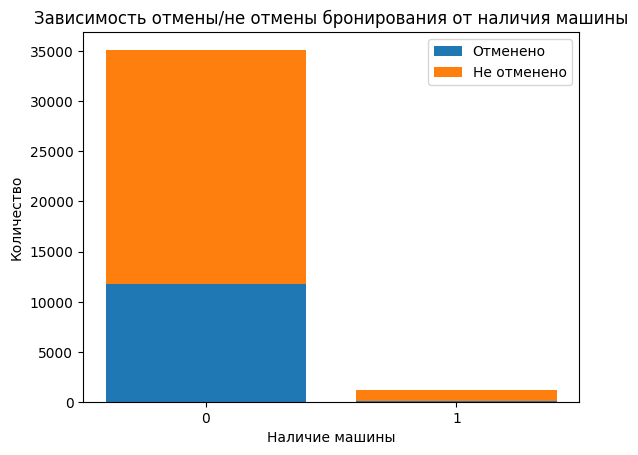

In [ ]:
plt.bar(car_parking, canceled, label='Отменено')
plt.bar(car_parking, non_canceled, bottom=canceled, label='Не отменено')
plt.legend()
plt.xlabel('Наличие машины')
plt.ylabel('Количество')
plt.title('Зависимость отмены/не отмены бронирования от наличия машины')
plt.show()

Можно сказать, что у большинства гостей нет машины. Вместе с тем, те, у кого её она есть, практически не отменяют свои бронирования. Среди тех, у кого машины нет, отменяют бронирование меньше трети гостей. Следовательно, наличие машины практически не влияет на перспективу отмены бронирования.

# Обучаем модель классификации

In [ ]:
data

,Booking_ID,amount_of_guests,children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,seasons,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,status,booking
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,Осень,Offline,0,0,0,65.00,0,Not_Canceled,0
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,Осень,Online,0,0,0,106.68,1,Not_Canceled,0
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,Зима,Online,0,0,0,60.00,0,Canceled,0
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,Весна,Online,0,0,0,100.00,0,Canceled,0
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,Весна,Online,0,0,0,94.50,0,Canceled,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,Лето,Online,0,0,0,167.80,1,Not_Canceled,0
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,Осень,Online,0,0,0,90.95,2,Canceled,0
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,Лето,Online,0,0,0,98.39,2,Not_Canceled,0
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,Весна,Online,0,0,0,94.50,0,Canceled,0


In [ ]:
data = data.drop('Booking_ID', axis=1)
data

,amount_of_guests,children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,seasons,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,status,booking
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,Осень,Offline,0,0,0,65.00,0,Not_Canceled,0
1,2,0,2,3,Not Selected,0,Room_Type 1,5,Осень,Online,0,0,0,106.68,1,Not_Canceled,0
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,Зима,Online,0,0,0,60.00,0,Canceled,0
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,Весна,Online,0,0,0,100.00,0,Canceled,0
4,2,0,1,1,Not Selected,0,Room_Type 1,48,Весна,Online,0,0,0,94.50,0,Canceled,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,Лето,Online,0,0,0,167.80,1,Not_Canceled,0
36271,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,Осень,Online,0,0,0,90.95,2,Canceled,0
36272,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,Лето,Online,0,0,0,98.39,2,Not_Canceled,0
36273,2,0,0,3,Not Selected,0,Room_Type 1,63,Весна,Online,0,0,0,94.50,0,Canceled,0


Для начала стандартизируем данные:

In [ ]:
scaler = StandardScaler() #создали экземпляр класса StandardScaler с именем scaler
columns = ['status', 'type_of_meal_plan','room_type_reserved', 'seasons', 'market_segment_type']

scaler.fit(data.drop(columns, axis=1)) #обучаем scaler на нашем датасете, используя метод fit
scaled_features = scaler.transform(data.drop(columns, axis=1)) #применили метод trancform для стандартизации признаков и сохранили результат в переменной scaled_features

Теперь преобразуем получившиеся данные в DataFrame:

In [ ]:
scaled_data = pd.DataFrame(scaled_features, columns = data.drop(columns, axis=1).columns)
selected_columns = ['type_of_meal_plan', 'room_type_reserved', 'seasons', 'market_segment_type']
new_data = pd.concat([scaled_data, data[selected_columns]], axis=1)
new_data

,amount_of_guests,children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking,type_of_meal_plan,room_type_reserved,seasons,market_segment_type
0,0.076515,-0.26147,0.217401,-0.144803,-0.178819,1.614896,-0.16221,-0.063393,-0.087456,-1.095033,-0.788140,-0.096981,Meal Plan 1,Room_Type 1,Осень,Offline
1,0.076515,-0.26147,1.365993,0.563972,-0.178819,-0.933701,-0.16221,-0.063393,-0.087456,0.092806,0.483760,-0.096981,Not Selected,Room_Type 1,Осень,Online
2,-1.461195,-0.26147,1.365993,-0.853578,-0.178819,-0.980250,-0.16221,-0.063393,-0.087456,-1.237528,-0.788140,-0.096981,Meal Plan 1,Room_Type 1,Зима,Online
3,0.076515,-0.26147,-0.931190,-0.144803,-0.178819,1.463610,-0.16221,-0.063393,-0.087456,-0.097567,-0.788140,-0.096981,Meal Plan 1,Room_Type 1,Весна,Online
4,0.076515,-0.26147,0.217401,-0.853578,-0.178819,-0.433291,-0.16221,-0.063393,-0.087456,-0.254312,-0.788140,-0.096981,Not Selected,Room_Type 1,Весна,Online
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,1.614224,-0.26147,1.365993,2.690296,-0.178819,-0.002706,-0.16221,-0.063393,-0.087456,1.834665,0.483760,-0.096981,Meal Plan 1,Room_Type 4,Лето,Online
36271,0.076515,-0.26147,0.217401,0.563972,-0.178819,1.661446,-0.16221,-0.063393,-0.087456,-0.355483,1.755661,-0.096981,Meal Plan 1,Room_Type 1,Осень,Online
36272,0.076515,-0.26147,1.365993,2.690296,-0.178819,0.730452,-0.16221,-0.063393,-0.087456,-0.143451,1.755661,-0.096981,Meal Plan 1,Room_Type 1,Лето,Online
36273,0.076515,-0.26147,-0.931190,0.563972,-0.178819,-0.258730,-0.16221,-0.063393,-0.087456,-0.254312,-0.788140,-0.096981,Not Selected,Room_Type 1,Весна,Online


In [ ]:
sts = []
for value in data['status']:
    if value == 'Canceled':
        sts.append(1)
    else:
        sts.append(0)

data['status'] = sts
data

,amount_of_guests,children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,seasons,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,status,booking
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,Осень,Offline,0,0,0,65.00,0,0,0
1,2,0,2,3,Not Selected,0,Room_Type 1,5,Осень,Online,0,0,0,106.68,1,0,0
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,Зима,Online,0,0,0,60.00,0,1,0
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,Весна,Online,0,0,0,100.00,0,1,0
4,2,0,1,1,Not Selected,0,Room_Type 1,48,Весна,Online,0,0,0,94.50,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,Лето,Online,0,0,0,167.80,1,0,0
36271,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,Осень,Online,0,0,0,90.95,2,1,0
36272,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,Лето,Online,0,0,0,98.39,2,0,0
36273,2,0,0,3,Not Selected,0,Room_Type 1,63,Весна,Online,0,0,0,94.50,0,1,0


In [ ]:
data_dum = pd.get_dummies(new_data)
data_dum

,amount_of_guests,children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,...,room_type_reserved_Room_Type 7,seasons_Весна,seasons_Зима,seasons_Лето,seasons_Осень,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,0.076515,-0.26147,0.217401,-0.144803,-0.178819,1.614896,-0.16221,-0.063393,-0.087456,-1.095033,...,0,0,0,0,1,0,0,0,1,0
1,0.076515,-0.26147,1.365993,0.563972,-0.178819,-0.933701,-0.16221,-0.063393,-0.087456,0.092806,...,0,0,0,0,1,0,0,0,0,1
2,-1.461195,-0.26147,1.365993,-0.853578,-0.178819,-0.980250,-0.16221,-0.063393,-0.087456,-1.237528,...,0,0,1,0,0,0,0,0,0,1
3,0.076515,-0.26147,-0.931190,-0.144803,-0.178819,1.463610,-0.16221,-0.063393,-0.087456,-0.097567,...,0,1,0,0,0,0,0,0,0,1
4,0.076515,-0.26147,0.217401,-0.853578,-0.178819,-0.433291,-0.16221,-0.063393,-0.087456,-0.254312,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,1.614224,-0.26147,1.365993,2.690296,-0.178819,-0.002706,-0.16221,-0.063393,-0.087456,1.834665,...,0,0,0,1,0,0,0,0,0,1
36271,0.076515,-0.26147,0.217401,0.563972,-0.178819,1.661446,-0.16221,-0.063393,-0.087456,-0.355483,...,0,0,0,0,1,0,0,0,0,1
36272,0.076515,-0.26147,1.365993,2.690296,-0.178819,0.730452,-0.16221,-0.063393,-0.087456,-0.143451,...,0,0,0,1,0,0,0,0,0,1
36273,0.076515,-0.26147,-0.931190,0.563972,-0.178819,-0.258730,-0.16221,-0.063393,-0.087456,-0.254312,...,0,1,0,0,0,0,0,0,0,1


In [ ]:
Data = pd.concat([data_dum, data['status']], axis = 1)
Data

,amount_of_guests,children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,...,seasons_Весна,seasons_Зима,seasons_Лето,seasons_Осень,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,status
0,0.076515,-0.26147,0.217401,-0.144803,-0.178819,1.614896,-0.16221,-0.063393,-0.087456,-1.095033,...,0,0,0,1,0,0,0,1,0,0
1,0.076515,-0.26147,1.365993,0.563972,-0.178819,-0.933701,-0.16221,-0.063393,-0.087456,0.092806,...,0,0,0,1,0,0,0,0,1,0
2,-1.461195,-0.26147,1.365993,-0.853578,-0.178819,-0.980250,-0.16221,-0.063393,-0.087456,-1.237528,...,0,1,0,0,0,0,0,0,1,1
3,0.076515,-0.26147,-0.931190,-0.144803,-0.178819,1.463610,-0.16221,-0.063393,-0.087456,-0.097567,...,1,0,0,0,0,0,0,0,1,1
4,0.076515,-0.26147,0.217401,-0.853578,-0.178819,-0.433291,-0.16221,-0.063393,-0.087456,-0.254312,...,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,1.614224,-0.26147,1.365993,2.690296,-0.178819,-0.002706,-0.16221,-0.063393,-0.087456,1.834665,...,0,0,1,0,0,0,0,0,1,0
36271,0.076515,-0.26147,0.217401,0.563972,-0.178819,1.661446,-0.16221,-0.063393,-0.087456,-0.355483,...,0,0,0,1,0,0,0,0,1,1
36272,0.076515,-0.26147,1.365993,2.690296,-0.178819,0.730452,-0.16221,-0.063393,-0.087456,-0.143451,...,0,0,1,0,0,0,0,0,1,0
36273,0.076515,-0.26147,-0.931190,0.563972,-0.178819,-0.258730,-0.16221,-0.063393,-0.087456,-0.254312,...,1,0,0,0,0,0,0,0,1,1


Разделим выборку на обучающую и тестовую:

In [ ]:
from sklearn.model_selection import train_test_split #импортируем функцию train_test_split, чтобы разделить выборку на обучающую и тестовую части
x = data_dum
y = Data['status'] #указали значения X и Y, которые будут переданы в train_test_split

Запустим функцию train_test_split, используя test_size 30%

In [ ]:
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x, y, test_size = 0.3)

Обучение модели:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier #импортировали алгоритм
model = KNeighborsClassifier(n_neighbors = 1) #создали экзампляр класса KNeighborsClassifier и положили в переменную model (параметр n_neighbors = 1 - это выбранное число соседей)
model.fit(x_training_data, y_training_data) #обучили модель

KNeighborsClassifier(n_neighbors=1)

Предсказания с помощью KNN:

In [ ]:
predictions = model.predict(x_test_data) #присвоили предсказания переменной

Теперь можно оценить точность модели:

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test_data, predictions))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      7286
           1       0.76      0.76      0.76      3597

    accuracy                           0.84     10883
   macro avg       0.82      0.82      0.82     10883
weighted avg       0.84      0.84      0.84     10883



Precision (точность): Для класса 0 (первый класс) значение precision составляет 0.88, что означает, что 88% объектов, предсказанных как класс 0, являются верными. Для класса 1 (второй класс) значение precision составляет 0.77, что означает, что 77% объектов, предсказанных как класс 1, являются верными. Высокое значение precision указывает на хорошую способность модели к правильной классификации объектов.

Recall (полнота): Для класса 0 значение recall составляет 0.89, что означает, что модель правильно классифицировала 89% объектов класса 0 относительно общего числа фактических объектов этого класса. Для класса 1 значение recall составляет 0.75, что означает, что модель правильно классифицировала 75% объектов класса 1 относительно общего числа фактических объектов этого класса. Высокое значение recall указывает на хорошую способность модели обнаруживать объекты заданного класса.

F1-мера (F1-score): F1-мера является гармоническим средним между precision и recall. Для класса 0 значение F1-меры составляет 0.88, а для класса 1 - 0.76. Высокое значение F1-меры указывает на хороший баланс между precision и recall, что говорит о хорошей общей производительности модели.

Accuracy (точность): Значение accuracy составляет 0.84, что означает, что модель правильно классифицировала 84% объектов в общей выборке. Она представляет общую точность модели, но не учитывает различия между классами.

В целом, модель показывает хорошие результаты с точки зрения precision, recall и F1-меры для обоих классов.

Попробуем поменять test_size и заново оценить метрики качества модели:

Запустим функцию train_test_split, используя test_size 40%

In [ ]:
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x, y, test_size = 0.4)

Обучение модели:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier #импортировали алгоритм
model = KNeighborsClassifier(n_neighbors = 1) #создали экзампляр класса KNeighborsClassifier и положили в переменную model (параметр n_neighbors = 1 - это выбранное число соседей)
model.fit(x_training_data, y_training_data) #обучили модель

KNeighborsClassifier(n_neighbors=1)

Предсказания с помощью KNN:

In [ ]:
predictions = model.predict(x_test_data) #присвоили предсказания переменной

Теперь можно оценить точность модели:

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test_data, predictions))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      9788
           1       0.75      0.75      0.75      4722

    accuracy                           0.84     14510
   macro avg       0.81      0.81      0.81     14510
weighted avg       0.84      0.84      0.84     14510



Судя по метрикам, качество модели при таком test_size падает. Соответственно, уменьшать обучающую выборку. Увеличивать её также не стоит, чтобы избежать переобучения модели.

Теперь выберем оптимальное значение для K:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

X = data_dum # подготовка данных: X - признаки, y - целевая переменная
y = Data['status']

k_values = list(range(1, 101)) # задаем список значений k, которые хотим проверить

accuracy_scores = {} # создаем словарь для сохранения средних оценок точности для каждого k

# проходим по каждому значению k и оцениваем точность с помощью кросс-валидации
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    accuracy_scores[k] = scores.mean()

# выводим средние оценки точности для каждого значения k
for k, score in accuracy_scores.items():
    print(f"K = {k}: Accuracy = {score}")

K = 1: Accuracy = 0.8478842177808408
K = 2: Accuracy = 0.8497863542384563
K = 3: Accuracy = 0.8519917298414887
K = 4: Accuracy = 0.8498139214334941
K = 5: Accuracy = 0.8516884906960716
K = 6: Accuracy = 0.8490696071674707
K = 7: Accuracy = 0.8493177119228118
K = 8: Accuracy = 0.8478842177808408
K = 9: Accuracy = 0.8466712611991729
K = 10: Accuracy = 0.8479669193659545
K = 11: Accuracy = 0.8484079944865609
K = 12: Accuracy = 0.8497863542384563
K = 13: Accuracy = 0.8492350103376982
K = 14: Accuracy = 0.848435561681599
K = 15: Accuracy = 0.8482425913163336
K = 16: Accuracy = 0.8478015161957272
K = 17: Accuracy = 0.8468090971743625
K = 18: Accuracy = 0.8468642315644382
K = 19: Accuracy = 0.8450723638869746
K = 20: Accuracy = 0.8436664369400415
K = 21: Accuracy = 0.8432529290144727
K = 22: Accuracy = 0.8437215713301172
K = 23: Accuracy = 0.8432804962095106
K = 24: Accuracy = 0.8441075120606477
K = 25: Accuracy = 0.8428118538938664
K = 26: Accuracy = 0.8422329427980703
K = 27: Accuracy = 0.8

Теперь выберем лучшее K из списка:

In [ ]:
max_accuracy = max(accuracy_scores.values())
best_k = [k for k, v in accuracy_scores.items() if v == max_accuracy]

print(f"Лучшее значение k: {best_k}")
print(f"Максимальная точность: {max_accuracy}")

Лучшее значение k: [3]
Максимальная точность: 0.8519917298414887


Теперь обучим модель логистической регрессии для той же задачи:

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.metrics import fbeta_score, precision_recall_curve


# Отключение некоторых лишних предупреждений
import warnings
warnings.filterwarnings("ignore")

In [ ]:
model_regression = LogisticRegression()

from sklearn.model_selection import train_test_split #импортируем функцию train_test_split, чтобы разделить выборку на обучающую и тестовую части
x = data_dum
y = Data['status'] #указали значения X и Y, которые будут переданы в train_test_split

Запустим функцию train_test_split, используя test_size 30%

In [ ]:
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x, y, test_size = 0.3)

Обучение модели:

In [ ]:
from sklearn.linear_model import LogisticRegression #импортировали алгоритм
model = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs') #создали экзампляр класса LogisticRegression и положили в переменную model
model.fit(x_training_data, y_training_data) #обучили модель

LogisticRegression()

Предсказания с помощью KNN:

In [ ]:
predictions = model.predict(x_test_data) #присвоили предсказания переменной

Теперь можно оценить точность модели:

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy:', accuracy_score(y_test_data, predictions))
print('Precision:', precision_score(y_test_data, predictions))
print('Recall:', recall_score(y_test_data, predictions))
print('F1-score:', f1_score(y_test_data, predictions))


Accuracy: 0.8017090875677663
Precision: 0.7421259842519685
Recall: 0.6224545954870666
F1-score: 0.6770428015564202


Данные результаты говорят о том, что модель логистической регрессии имеет достаточно высокую точность (accuracy) в предсказании классов, однако меньшую полноту (recall), что может означать, что модель может некорректно классифицировать некоторые объекты как отрицательные. Также можно заметить, что значение precision близко к значению recall, что может свидетельствовать о том, что модель не сильно смещена в сторону одного из классов. Общий F1-скор показывает среднее гармоническое между precision и recall, и он также достаточно высокий, что говорит о том, что модель имеет баланс между точностью и полнотой.

Для настройки гиперпараметров модели используем метод GridSearchCV (используем кросс-валидацию с 5-ю фолдами):

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'penalty': ['l1', 'l2'],
              'C': [0.01, 0.1, 1.0, 10.0],
              'solver': ['saga']}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(x_training_data, y_training_data)

print('Best parameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

Best parameters: {'C': 10.0, 'penalty': 'l1', 'solver': 'saga'}
Best score: 0.8015123475243187


#Проверим приведенные гипотезы с помощью z-теста

### №1 гипотеза о влиянии количества гостей на отмену бронирования: можно предположить, что бронирования с большим количеством гостей менее склонны к большей вероятности отмены

Проверим гипотезу с помощью z-теста

Для начала для удобства создадим переменные с нужными нам столбцами, в данном случае с amount_of_guests и status.

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest

guests = data['amount_of_guests']
status = data['status']

Далее мы разделим наши переменные на две части: бронирование с малым количеством гостей и бронирование с большим количеством гостей.

In [ ]:
group1_status = status[guests > 2] # Группа с большим количеством гостей
group2_status = status[guests <= 2] # Группа с меньшим или равным количеством гостей

Для проверки мы используем z-тест с разностью долей, т.к. в данном случае мы хотим сравнить доли отмененных бронирований в двух группах гостей.

Поэтому посчитаем доли

In [ ]:
p1 = group1_status.mean()
p2 = group2_status.mean()

Вычислим всё, что нам нужно для расчётной статистики

In [ ]:
# вычислим стандартную ошибку s
n1 = len(group1_status)
n2 = len(group2_status)

count = np.array([group1_status.sum(), group2_status.sum()])
nobs = np.array([n1, n2])
stat, pval = proportions_ztest(count, nobs)

alpha = 0.05

if pval < alpha:
    print("Количество гостей влияет на вероятность отмены бронирования")
else:
    print("Нельзя сделать вывод о влиянии количества гостей на вероятность отмены бронирования на основании проведенного теста")

Количество гостей влияет на вероятность отмены бронирования


Вывод: По данному z-тесту мы можем сказать, что различие между двумя группами значимое. Таким образом, мы можем сделать вывод, что количество гостей влияет на вероятность отмены бронирования

###№2 гипотеза о влиянии времени ожидания (lead_time) на отмену бронирования: можно предположить, что бронирования с более длительным временем ожидания имеют более высокую вероятность отмены;

Проверим гипотезу с помощью z-теста

Чтобы сравнить доли отмененных бронирований, мы сразу можем разделить наши переменные на две части: группу с более длительным временем ожидания и группу с более коротким временем ожидания.

In [ ]:
group1_lead_time = data[data['lead_time'] > 30]  # Группа с более длительным временем ожидания
group2_lead_time = data[data['lead_time'] <= 30]  # Группа с более коротким временем ожидания

Для проверки мы используем z-тест с разностью долей, т.к. в данном случае мы хотим сравнить доли отмененных бронирований в двух группах гостей

Мы вычисляем долю отмененных бронирований в каждой группе и сравниваем их с помощью z-теста для разности долей.

In [ ]:
p1 = group1_lead_time['status'].mean()
p2 = group2_lead_time['status'].mean()

Вычислим всё, что нам нужно для расчётной статистики

In [ ]:
# вычислим стандартную ошибку s
n1 = len(group1_status)
n2 = len(group2_status)

count = np.array([group1_lead_time['status'].sum(), group2_lead_time['status'].sum()])
nobs = np.array([n1, n2])
stat, pval = proportions_ztest(count, nobs)

if pval < 0.05:
    print("Время ожидания влияет на вероятность отмены бронирования")
else:
    print("Нельзя сделать вывод о влиянии времени ожидания на вероятность отмены бронирования на основании проведенного теста")

Время ожидания влияет на вероятность отмены бронирования


Вывод: По данному z-тесту мы можем сказать, что различие между двумя группами значимое. Таким образом, мы можем сделать вывод, что время ожидания влияет на вероятность отмены бронирования

###№3 гипотеза о влиянии наличия парковочного места (required_car_parking_space) на отмену бронирования: можно предположить, что клиенты, которым требуется парковочное место (соответственно, у них есть машина), имеют более низкую вероятность отмены;

Проверим гипотезу с помощью z-теста

Чтобы сравнить доли отмененных бронирований, мы сразу можем разделить наши переменные на две части, где людям нужно парковочное место, и не нужно

In [ ]:
group1_car = data[data['required_car_parking_space'] == 1]  # Группа с требованием парковочного места
group2_car = data[data['required_car_parking_space'] == 0]  # Группа без требования парковочного места

Для проверки мы используем z-тест с разностью долей, т.к. в данном случае мы хотим сравнить доли отмененных бронирований в двух группах гостей

Мы вычисляем долю отмененных бронирований в каждой группе и сравниваем их с помощью z-теста для разности долей.

In [ ]:
p1 = group1_car['status'].mean()
p2 = group2_car['status'].mean()

Вычислим всё, что нам нужно для расчётной статистики

In [ ]:
# вычислим стандартную ошибку s
n1 = len(group1_car)
n2 = len(group2_car)

count = np.array([group1_car['status'].sum(), group2_car['status'].sum()])
nobs = np.array([n1, n2])
stat, pval = proportions_ztest(count, nobs)

if pval < 0.05:
    print("Наличие машины влияет на вероятность отмены бронирования")
else:
    print("Нельзя сделать вывод о вероятность отмены бронирования на основании проведенного теста, если у поситителей нет машины")

Наличие машины влияет на вероятность отмены бронирования


Вывод: По данному z-тесту мы можем сказать, что различие между двумя группами значимое. Таким образом, мы можем сделать вывод, что наличие парковочного места влияет на вероятность отмены бронирования

###№4 гипотеза о влиянии времени года на отмену бронирования: в тёплое время года вероятность отмены бронирования снижается, так как люди едут в отпуска, которые планируют заблаговременно.

Проверим гипотезу с помощью z-теста

In [ ]:
seasons = data['seasons']
status = data['status']

Чтобы сравнить доли отмененных бронирований, мы сразу можем разделить наши переменные на две части, теплое время года и нет

In [ ]:
group1_seas = status[seasons == 'Весна' 'Лето']
group2_seas = status[seasons != 'Осень' 'Зима']

Для проверки мы используем z-тест с разностью долей, т.к. в данном случае мы хотим сравнить доли отмененных бронирований в двух группах гостей

Мы вычисляем долю отмененных бронирований в каждой группе и сравниваем их с помощью z-теста для разности долей.

In [ ]:
p1 = group1_seas.mean()
p2 = group2_seas.mean()

Вычислим всё, что нам нужно для расчётной статистики

In [ ]:
count = np.array([group1_seas.sum(), group2_seas.sum()])
nobs = np.array([n1, n2])
stat, pval = proportions_ztest(count, nobs)

alpha = 0.05
if pval < alpha:
    print("Время года влияет на отмену бронирования")
else:
    print("Нельзя сделать вывод о влиянии времени года на вероятность отмены бронирования на основании проведенного теста")

Время года влияет на отмену бронирования


Вывод: По данному z-тесту мы можем сказать, что различие между двумя группами значимое. Таким образом, мы можем сделать вывод, что время года влияет на вероятность отмены бронирования

Теперь попробуем обучить модель логистической регрессии, которая выполняла бы ту же задачу, что и knn: предсказывала, отменит ли клиент свою бронь.

# Обучаем модель регрессии

Все переменные прежние. Изменится лишь то, что теперь целевой переменной будет avg_price_per_room - стоимость номера

Посмотрим, как остальные переменные связаны с целевой. Предполагаем, что на цену может влиять 3 основных фактора: количество гостей, количество выходных ночей и промежуток, за который клиент забронировал номер.

In [ ]:
data

,amount_of_guests,children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,seasons,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,status,booking
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,Осень,Offline,0,0,0,65.00,0,0,0
1,2,0,2,3,Not Selected,0,Room_Type 1,5,Осень,Online,0,0,0,106.68,1,0,0
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,Зима,Online,0,0,0,60.00,0,1,0
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,Весна,Online,0,0,0,100.00,0,1,0
4,2,0,1,1,Not Selected,0,Room_Type 1,48,Весна,Online,0,0,0,94.50,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,Лето,Online,0,0,0,167.80,1,0,0
36271,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,Осень,Online,0,0,0,90.95,2,1,0
36272,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,Лето,Online,0,0,0,98.39,2,0,0
36273,2,0,0,3,Not Selected,0,Room_Type 1,63,Весна,Online,0,0,0,94.50,0,1,0


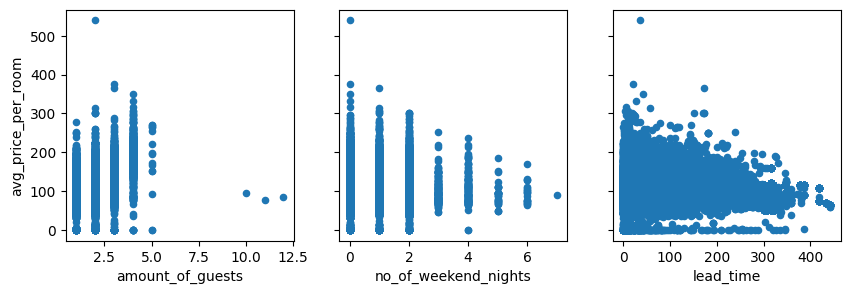

In [ ]:
fig, axs = plt.subplots(1, 3, sharey=True)

data.plot(kind='scatter', x='amount_of_guests', y='avg_price_per_room', ax=axs[0], figsize=(10, 3))
data.plot(kind='scatter', x='no_of_weekend_nights', y='avg_price_per_room', ax=axs[1])
data.plot(kind='scatter', x='lead_time', y='avg_price_per_room', ax=axs[2]);

По графикам корреляция lead_time, количества гостей и количества выходных ночей со стоимостью слабо прослеживается. Попробуем посчитать точные значения:

In [ ]:
data[['amount_of_guests', 'no_of_weekend_nights', 'lead_time']].corrwith(data['avg_price_per_room'])

amount_of_guests        0.445906
no_of_weekend_nights   -0.004525
lead_time              -0.062596
dtype: float64

Коэффцициент корреляции amount_of_guests и avg_price_per_room = 0.45. Следовательно, между этими переменными наблюдается слабая прямая взаимосвязь.
Коэффцициент корреляции no_of_weekend_nights и avg_price_per_room = - 0.004. Можно сказать, что между этими переменными не наблюдается взаимосвязи.
Коэффцициент корреляции lead_time и avg_price_per_room = - 0.06. Значит, между этими переменными также не наблюдается взаимосвязь. **Предполагаем, что качество модели будет низким, так как ни одна из переменных значительным образом не влияет на цену номера.**

Приступим к обучению модели

In [ ]:
data

,amount_of_guests,children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,seasons,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,status,booking
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,Осень,Offline,0,0,0,65.00,0,0,0
1,2,0,2,3,Not Selected,0,Room_Type 1,5,Осень,Online,0,0,0,106.68,1,0,0
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,Зима,Online,0,0,0,60.00,0,1,0
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,Весна,Online,0,0,0,100.00,0,1,0
4,2,0,1,1,Not Selected,0,Room_Type 1,48,Весна,Online,0,0,0,94.50,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,Лето,Online,0,0,0,167.80,1,0,0
36271,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,Осень,Online,0,0,0,90.95,2,1,0
36272,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,Лето,Online,0,0,0,98.39,2,0,0
36273,2,0,0,3,Not Selected,0,Room_Type 1,63,Весна,Online,0,0,0,94.50,0,1,0


Стандартизируем числовые признаки за исключением цены номера:

In [ ]:
scaler = StandardScaler() #создали экземпляр класса StandardScaler с именем scaler
columns = ['avg_price_per_room', 'type_of_meal_plan','room_type_reserved', 'seasons', 'market_segment_type']

scaler.fit(data.drop(columns, axis=1)) #обучаем scaler на нашем датасете, используя метод fit
scaled_features = scaler.transform(data.drop(columns, axis=1)) #применили метод trancform для стандартизации признаков и сохранили результат в переменной scaled_features

In [ ]:
scaled_data = pd.DataFrame(scaled_features, columns = data.drop(columns, axis=1).columns)
selected_columns = ['avg_price_per_room', 'type_of_meal_plan', 'room_type_reserved', 'seasons', 'market_segment_type']
new_data = pd.concat([scaled_data, data[selected_columns]], axis=1)
new_data

,amount_of_guests,children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,no_of_special_requests,status,booking,avg_price_per_room,type_of_meal_plan,room_type_reserved,seasons,market_segment_type
0,0.076515,-0.26147,0.217401,-0.144803,-0.178819,1.614896,-0.16221,-0.063393,-0.087456,-0.788140,-0.698062,-0.096981,65.00,Meal Plan 1,Room_Type 1,Осень,Offline
1,0.076515,-0.26147,1.365993,0.563972,-0.178819,-0.933701,-0.16221,-0.063393,-0.087456,0.483760,-0.698062,-0.096981,106.68,Not Selected,Room_Type 1,Осень,Online
2,-1.461195,-0.26147,1.365993,-0.853578,-0.178819,-0.980250,-0.16221,-0.063393,-0.087456,-0.788140,1.432539,-0.096981,60.00,Meal Plan 1,Room_Type 1,Зима,Online
3,0.076515,-0.26147,-0.931190,-0.144803,-0.178819,1.463610,-0.16221,-0.063393,-0.087456,-0.788140,1.432539,-0.096981,100.00,Meal Plan 1,Room_Type 1,Весна,Online
4,0.076515,-0.26147,0.217401,-0.853578,-0.178819,-0.433291,-0.16221,-0.063393,-0.087456,-0.788140,1.432539,-0.096981,94.50,Not Selected,Room_Type 1,Весна,Online
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,1.614224,-0.26147,1.365993,2.690296,-0.178819,-0.002706,-0.16221,-0.063393,-0.087456,0.483760,-0.698062,-0.096981,167.80,Meal Plan 1,Room_Type 4,Лето,Online
36271,0.076515,-0.26147,0.217401,0.563972,-0.178819,1.661446,-0.16221,-0.063393,-0.087456,1.755661,1.432539,-0.096981,90.95,Meal Plan 1,Room_Type 1,Осень,Online
36272,0.076515,-0.26147,1.365993,2.690296,-0.178819,0.730452,-0.16221,-0.063393,-0.087456,1.755661,-0.698062,-0.096981,98.39,Meal Plan 1,Room_Type 1,Лето,Online
36273,0.076515,-0.26147,-0.931190,0.563972,-0.178819,-0.258730,-0.16221,-0.063393,-0.087456,-0.788140,1.432539,-0.096981,94.50,Not Selected,Room_Type 1,Весна,Online


Применим get_dummies, чтобы избавиться от нечисловых признаков:

In [ ]:
Data = pd.get_dummies(new_data)
Data

,amount_of_guests,children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,no_of_special_requests,...,room_type_reserved_Room_Type 7,seasons_Весна,seasons_Зима,seasons_Лето,seasons_Осень,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,0.076515,-0.26147,0.217401,-0.144803,-0.178819,1.614896,-0.16221,-0.063393,-0.087456,-0.788140,...,0,0,0,0,1,0,0,0,1,0
1,0.076515,-0.26147,1.365993,0.563972,-0.178819,-0.933701,-0.16221,-0.063393,-0.087456,0.483760,...,0,0,0,0,1,0,0,0,0,1
2,-1.461195,-0.26147,1.365993,-0.853578,-0.178819,-0.980250,-0.16221,-0.063393,-0.087456,-0.788140,...,0,0,1,0,0,0,0,0,0,1
3,0.076515,-0.26147,-0.931190,-0.144803,-0.178819,1.463610,-0.16221,-0.063393,-0.087456,-0.788140,...,0,1,0,0,0,0,0,0,0,1
4,0.076515,-0.26147,0.217401,-0.853578,-0.178819,-0.433291,-0.16221,-0.063393,-0.087456,-0.788140,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,1.614224,-0.26147,1.365993,2.690296,-0.178819,-0.002706,-0.16221,-0.063393,-0.087456,0.483760,...,0,0,0,1,0,0,0,0,0,1
36271,0.076515,-0.26147,0.217401,0.563972,-0.178819,1.661446,-0.16221,-0.063393,-0.087456,1.755661,...,0,0,0,0,1,0,0,0,0,1
36272,0.076515,-0.26147,1.365993,2.690296,-0.178819,0.730452,-0.16221,-0.063393,-0.087456,1.755661,...,0,0,0,1,0,0,0,0,0,1
36273,0.076515,-0.26147,-0.931190,0.563972,-0.178819,-0.258730,-0.16221,-0.063393,-0.087456,-0.788140,...,0,1,0,0,0,0,0,0,0,1


Разделим выборку на обучающую и тестовую с test_size = 0.4

In [ ]:
X = Data.drop('avg_price_per_room', axis=1)
y = Data['avg_price_per_room']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

Обучаем модель на обучающей выборке и определяем коэффициенты:

In [ ]:
#подгрузили модель и объявили её
from sklearn.linear_model import LinearRegression
model_regression = LinearRegression()
model_regression.fit(X_train, y_train)
model_regression.coef_, model_regression.intercept_

(array([ 6.12335442e+00,  8.25481328e-01, -2.24015381e+00, -1.33136488e+00,
         1.60460982e+00, -5.73726557e+00, -1.55829523e+00, -1.26269886e-02,
        -6.03304117e-01,  2.38594345e+00,  4.27421423e+00,  1.41635204e-01,
         3.75507902e+12,  3.75507902e+12,  3.75507902e+12,  3.75507902e+12,
         7.59836984e+12,  7.59836984e+12,  7.59836984e+12,  7.59836984e+12,
         7.59836984e+12,  7.59836984e+12,  7.59836984e+12,  6.54658771e+11,
         6.54658771e+11,  6.54658771e+11,  6.54658771e+11,  5.99527855e+12,
         5.99527855e+12,  5.99527855e+12,  5.99527855e+12,  5.99527855e+12]),
 -18003386176797.605)

Прогнозируем целевые значения для тестовой выборки:

In [ ]:
y_pred = model_regression.predict(X_test)
y_pred

array([ 98.171875  , 110.4609375 , 108.46484375, ..., 107.79296875,
        74.73046875,  79.05859375])

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#оценка производительности модели с использованием среднеквадратической ошибки (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

r2 = r2_score(y_test, y_pred)
print("Коэффициент детерминации (R-квадрат):", r2)

# Оценка производительности модели с использованием средней абсолютной ошибки (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Средняя абсолютная ошибка (MAE):", mae)

Mean Squared Error: 582.6907651635221
Коэффициент детерминации (R-квадрат): 0.5313990150672625
Средняя абсолютная ошибка (MAE): 17.598917083046175


В контексте оценки модели линейной регрессии мы рассмотрели такие метрики качества как MAE, MSE, R2.

MAE = 17.6. Это значит, что средняя разница между прогнозируемым значением целевой переменной и фактическим значением составляет 17.6 единиц. Учитывая, что стоимость номера колеблется от 104 до 540 (судя по data.describe()), такое значение коэффициента весьма удовлетворительно.

MSE = 582.7. Это слабый результат, модель достаточно плохо предсказывает данные.

R2 = 0.53. Значение 0.53 означает, что модель объясняет 53% дисперсии целевой переменной, а оставшиеся 47% остаются непредсказуемыми и могут быть связаны с другими факторами, которые не учтены в модели.

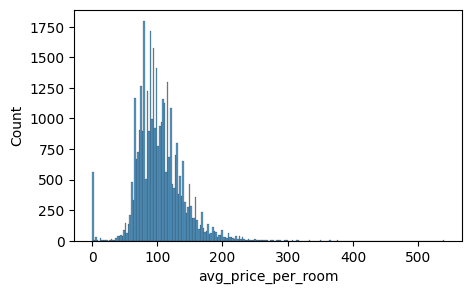

In [ ]:
plt.figure(figsize=(5,3))
sns.histplot(data.avg_price_per_room);

Мы предполагаем, что такое весьма низкое качество модели обусловлено достаточно значительным количеством выбросом, которые можно наблюдать на графике. Кроме того, мы заметили, что никакие из признаков не коррелируют в значительной степени с ценой (когда выводили значения коэффициента корреляции и диаграммы рассеивания перед обучением модели). Соответственно, можно сделать вывод о том, что данных, представленных в датасете, скорее всего, недостаточно для того, чтобы обучить модель для предсказания стоимости номера (изменения test_size также не давали положительного результата).